# Practice notebook for hypothesis tests using NHANES data

This notebook will give you the opportunity to perform some hypothesis tests with the NHANES data that are similar to
what was done in the week 3 case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")

In [2]:
nhanes = da.copy()

In [3]:
nhanes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 28 columns):
SEQN        5735 non-null int64
ALQ101      5208 non-null float64
ALQ110      1731 non-null float64
ALQ130      3379 non-null float64
SMQ020      5735 non-null int64
RIAGENDR    5735 non-null int64
RIDAGEYR    5735 non-null int64
RIDRETH1    5735 non-null int64
DMDCITZN    5734 non-null float64
DMDEDUC2    5474 non-null float64
DMDMARTL    5474 non-null float64
DMDHHSIZ    5735 non-null int64
WTINT2YR    5735 non-null float64
SDMVPSU     5735 non-null int64
SDMVSTRA    5735 non-null int64
INDFMPIR    5134 non-null float64
BPXSY1      5401 non-null float64
BPXDI1      5401 non-null float64
BPXSY2      5535 non-null float64
BPXDI2      5535 non-null float64
BMXWT       5666 non-null float64
BMXHT       5673 non-null float64
BMXBMI      5662 non-null float64
BMXLEG      5345 non-null float64
BMXARML     5427 non-null float64
BMXARMC     5427 non-null float64
BMXWAIST    5368 non-null

## Question 1

Conduct a hypothesis test (at the 0.05 level) for the null hypothesis that the proportion of women who smoke is equal to the proportion of men who smoke.

In [5]:
# insert your code here

Hypothesis proportion males smoking = proportion females smoking
Alternative is they are not equal.

Two population difference in proportions test. T-test for two proportions.

In [50]:
#group by sex and count

,smokers,size
RIAGENDRx,,
female,0.304845,2972
male,0.513258,2753


In [31]:
#drop missing values


In [33]:
#conduct a t test with female population vs male populaitons


(16.42058555898443, 3.032088786691117e-59, 5723.0)

__Q1a.__ Write 1-2 sentences explaining the substance of your findings to someone who does not know anything about statistical hypothesis tests.

__Q1b.__ Create three 95% confidence intervals: one for the proportion of women who smoke, one for the proportion of men who smoke, and one for the difference in the rates of smoking between women and men.

In [48]:
#Building confidence intervals manually

Males
(0.49458749263718593, 0.5319290347874418)
Females
(0.2882949879861214, 0.32139545615923526)


In [57]:
# Building confidence interval for difference


(0.20818684127912837, 0.2086392420001427)

__Q1c.__ Comment on any ways in which the confidence intervals that you found in part b reinforce, contradict, or add support to the hypothesis test conducted in part a.

## Question 2

Partition the population into two groups based on whether a person has graduated college or not, using the educational attainment variable [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2).  Then conduct a test of the null hypothesis that the average heights (in centimeters) of the two groups are equal.  Next, convert the heights from centimeters to inches, and conduct a test of the null hypothesis that the average heights (in inches) of the two groups are equal.

In [76]:
# insert your code here

In [79]:
#drop nans in sample of grads

In [83]:
#test of two means on the null hypothesis that education level of grads is equal to the mean height of non-grads

167.85535055350553 165.46395864106353
9.705432880946814 10.172963714064156
(7.578706943765256, 4.0813240427733594e-14, 5415.0)


__Q2a.__ Based on the analysis performed here, are you confident that people who graduated from college have a different average height compared to people who did not graduate from college?

__Q2b:__ How do the results obtained using the heights expressed in inches compare to the results obtained using the heights expressed in centimeters?

## Question 3

Conduct a hypothesis test of the null hypothesis that the average BMI for men between 30 and 40 is equal to the average BMI for men between 50 and 60.  Then carry out this test again after log transforming the BMI values.

In [117]:
# insert your code here

#filter two series for the target populations



In [118]:
# print out mean and std of BMI for each group


Men 30-40: 29.61372950819672 6.657329568695859
Men 50-60: 29.25 6.002543588477157


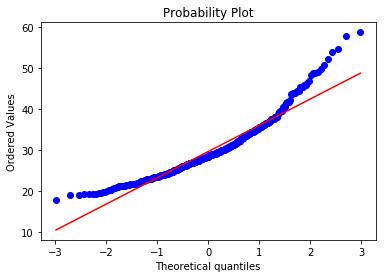

In [119]:
from scipy import stats
stats.probplot(bmi_m_30_40, plot=plt, fit=True)
plt.show()

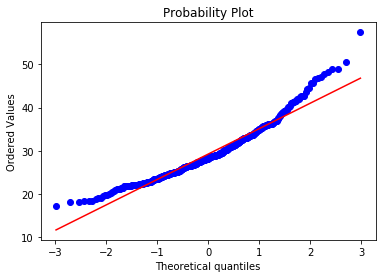

In [120]:
stats.probplot(bmi_m_50_60, plot=plt, fit=True)
plt.show()

In [122]:
#testing of two means using ttest unpooled because of the differences in std and the qq looks non-normal

bmi_30 = sm.stats.DescrStatsW(bmi_m_30_40)
bmi_50 = sm.stats.DescrStatsW(bmi_m_50_60)

sm.stats.CompareMeans(bmi_30, bmi_50).ztest_ind(usevar='unequal')

(0.8980221879527006, 0.3691737205589899)

__Q3a.__ How would you characterize the evidence that mean BMI differs between these age bands, and how would you characterize the evidence that mean log BMI differs between these age bands?

# From here, it is optional work: 

## Question 4

Suppose we wish to compare the mean BMI between college graduates and people who have not graduated from college, focusing on women between the ages of 30 and 40.  First, consider the variance of BMI within each of these subpopulations using graphical techniques, and through the estimated subpopulation variances.  Then, calculate pooled and unpooled estimates of the standard error for the difference between the mean BMI in the two populations being compared.  Finally, test the null hypothesis that the two population means are equal, using each of the two different standard errors.

In [ ]:
# insert your code here

__Q4a.__ Comment on the strength of evidence against the null hypothesis that these two populations have equal mean BMI.

__Q4b.__ Comment on the degree to which the two populations have different variances, and on the extent to which the results using different approaches to estimating the standard error of the mean difference give divergent results.

## Question 5

Conduct a test of the null hypothesis that the first and second diastolic blood pressure measurements within a subject have the same mean values.

In [ ]:
# insert your code here

__Q5a.__ Briefly describe your findings for an audience that is not familiar with statistical hypothesis testing.

__Q5b.__ Pretend that the first and second diastolic blood pressure measurements were taken on different people.  Modfify the analysis above as appropriate for this setting.

In [ ]:
# insert your code here

__Q5c.__ Briefly describe how the approaches used and the results obtained in the preceeding two parts of the question differ.